In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def step(current, xlim = 8, ylim = 8): #для заполнения графа
    x = np.random.randint(xlim)
    y = np.random.randint(ylim)
    if(current[x, y] == 1):
        current[x, y] = 0
    elif(x > 0 and x < xlim - 1):
        if(y > 0 and y < ylim - 1):
            if(current[x - 1, y] == current[x + 1, y] == current[x, y - 1] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == 0):
            if(current[x - 1, y] == current[x + 1, y] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == ylim - 1):
            if(current[x - 1, y] == current[x + 1, y] == current[x, y - 1] == 0):
                current[x, y] = 1
    elif(x == 0):
        if(y > 0 and y < ylim - 1):
            if(current[x + 1, y] == current[x, y - 1] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == 0):
            if(current[x + 1, y] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == ylim - 1):
            if(current[x + 1, y] == current[x, y - 1] == 0):
                current[x, y] = 1
    else:
        if(y > 0 and y < ylim - 1):
            if(current[x - 1, y] == current[x, y - 1] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == 0):
            if(current[x - 1, y] == current[x, y + 1] == 0):
                current[x, y] = 1
        elif(y == ylim - 1):
            if(current[x - 1, y] == current[x, y - 1] == 0):
                current[x, y] = 1
                
    return current



Task 1

In [20]:
n = 10000
current = np.zeros((8, 8))
walk = []
xlim = 8
ylim = 8
for i in range(n):
    current = step(current)
    walk.append(np.sum(current))

expect = np.array(walk).mean()
print(expect)

15.4195


Task 2

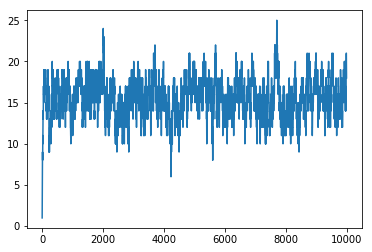

(Ttest_indResult(statistic=1.9367544528235927, pvalue=0.052959613318809384),
 Ttest_indResult(statistic=1.1291800642474483, pvalue=0.2769956150132061))

In [3]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

plt.plot(walk)
plt.show()

g_test(walk[500:]), g_test(walk[500::80])

Task 3

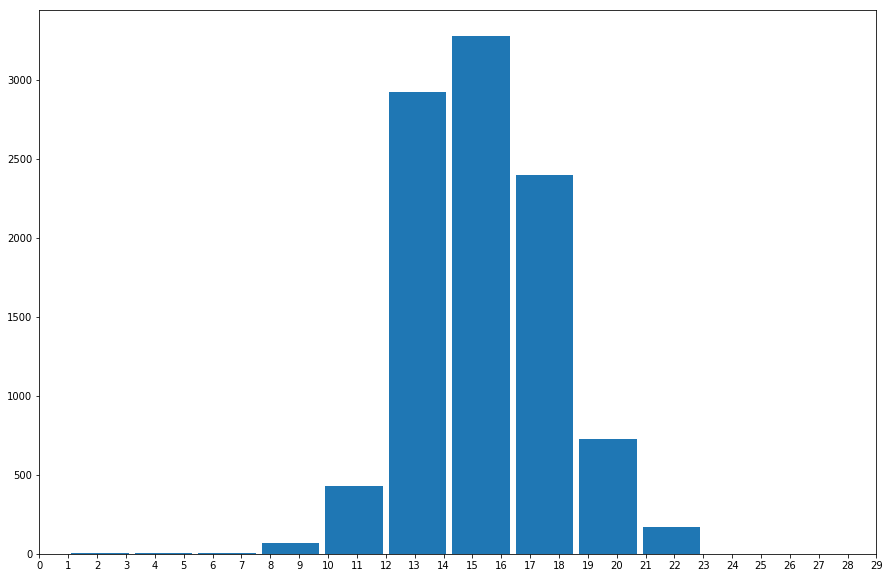

In [34]:
plt.figure(figsize = (15, 10))
plt.hist(walk,rwidth=0.9)
plt.xticks(np.arange(30))
plt.show()